In [55]:
import matplotlib.pyplot as plt
import plotly as py
import pandas as pd
import numpy as np
import statistics

In [2]:
#Load games
meta_games = pd.read_csv('Data/result.csv')

#to_drop = ["name", "console","userscore"]
#metascore_date_df = meta_games.copy()
#metascore_date_df.drop(to_drop, inplace=True, axis=1)

meta_games['year'] = np.nan
meta_games.replace('tbd', np.nan)

for i, row in meta_games.iterrows():
    year_value = meta_games['date'][i].split(',')[1].strip()
    meta_games.at[i,'year'] = int(year_value)

meta_games = meta_games.replace('tbd', np.nan)
meta_games_years = {}

# make a dict of meta_game dataframes for each year from 2000 to 2019
for i in range(2000,2019):
    meta_games_years[i] = meta_games[(meta_games['year'] == i)]
    
meta_games_years[2000].sample(5)


,metascore,name,console,userscore,date,year
3261,75,Super Bust-A-Move,PS2,NaN,"Nov 26, 2000",2000.0
3293,73,NASCAR 2001,PS,6.1,"Sep 19, 2000",2000.0
3200,81,NASCAR Heat,PC,7.7,"Sep 27, 2000",2000.0
5288,59,Tomb Raider: Chronicles,DC,8.3,"Nov 19, 2000",2000.0
1470,85,American McGee's Alice,PC,8,"Dec 6, 2000",2000.0


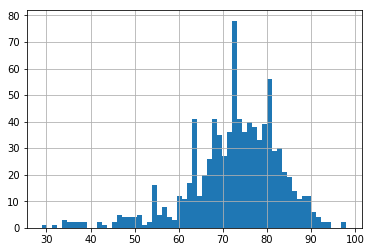

In [3]:
#Histogram with number of bins set to number of unique metascores
df = meta_games_years[2018]['metascore']
list1 = np.unique(meta_games_years[2018]['metascore']).shape
bins = list1[0]
hist = df.hist(bins=bins)

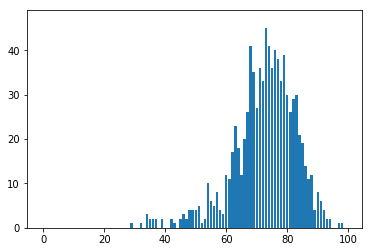

In [76]:
#Barchart for metascores for given year
#Needs slider to switch between years

#make a list of all metascores from given year, and array into list
metascore_year = np.flip((meta_games_years[2018]['metascore']))
metascore_year = list(metascore_year)


# go thorugh every number from 0 to 100, for each number, count how reviews there are with that value
# append number to list, such that each number on list represents how many reviews there are at that index.
score_freq=[]
for i in range(100):
    score_freq.append(metascore_year.count(i))
    
# set range for x axis to be range from 0 to 100
x_range = list(range(100))
index2 = np.arange(len(x_range))
plt.ylim(top=49)
plt.bar(index2, score_freq)
#plt.savefig('2018.png')
plt.show()

In [78]:
metascore_year = np.flip((meta_games_years[2001]['metascore']))
metascore_year = list(metascore_year)
#mean and median for year
sum(metascore_year) / float(len(metascore_year))
statistics.median(metascore_year)

73